In [103]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

if not os.path.exists("images"):
    os.mkdir("images")

# Import and merge datasets

In [104]:
df = pd.read_csv('data/athleteEvents.csv')
country = pd.read_excel('data/olympic_city_country.xlsx')
place = pd.read_csv('data/nocRegions.csv')

place = place.drop(['region', 'notes'],axis=1)
newdf1 = df.merge(place, how='right')

gpd = pd.read_excel('data/Gapminder GDP data.xlsx',sheet_name='countries_and_territories')

# data pre-processing 

In [105]:
df = newdf1.dropna(subset=['Year','Games'])
df['Team']= df['Team'].str.replace('[#,@,&,0-9]', '',regex=True)
df['City']= df['City'].str.replace('[#,@,&,0-9]', '',regex=True)
df['Team'] = df['Team'].str.lower()
df['City'] = df['City'].str.lower()

country['City'] = country['City'].str.replace(r'[#,@,&,0-9]', '', regex=True)
country['City'] = country['City'].str.lower()

country['Country'] = country['Country'].str.replace(r'[#,@,&,0-9]', '', regex=True)
country['Country'] = country['Country'].str.lower()

gpd['Country Name'] = gpd['Country Name'].str.replace(r'[#,@,&,0-9]', '', regex=True)
gpd['Country Name'] = gpd['Country Name'].str.lower()

/tmp/ipykernel_14123/2664385041.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_14123/2664385041.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_14123/2664385041.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1

In [106]:
# change great britain to united kingdom
df['Team'][df['Team']=='great britain']='united kingdom'

/tmp/ipykernel_14123/3236783604.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_14123/3236783604.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9462
Height     60083
Weight     62785
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     230993
dtype: int64

In [108]:
df=df.fillna(0)

## Gender participation pourcentage

In [115]:
df92=df[df['Year']==1900]
df20=df[df['Year']==2012]

In [116]:
pM = len(df92[df92["Sex"]=='M'])/(len(df92[df92["Sex"]=='M'])+len(df92[df92["Sex"]=='F']))
PF= len(df92[df92["Sex"]=='F'])/(len(df92[df92["Sex"]=='M'])+len(df92[df92["Sex"]=='F']))
print('Pourcentage of man', pM , " pourcentage of femel", PF)

Pourcentage of man 0.9829545454545454  pourcentage of femel 0.017045454545454544


In [117]:
dt= {"Sex":["M","F"],'participation pourcentage':[pM,PF],"Year":[1900,1900]}
dt=pd.DataFrame(dt)
dt

,Sex,participation pourcentage,Year
0,M,0.982955,1900
1,F,0.017045,1900


In [118]:
PM = len(df20[df20["Sex"]=='M'])/(len(df20[df20["Sex"]=='M'])+len(df20[df20["Sex"]=='F']))
pF= len(df20[df20["Sex"]=='F'])/(len(df20[df20["Sex"]=='M'])+len(df20[df20["Sex"]=='F']))
print('Pourcentage of man', pM , " pourcentage of femel", PF)

Pourcentage of man 0.9829545454545454  pourcentage of femel 0.017045454545454544


In [119]:
dt2= {"Sex":["M","F"],'participation pourcentage':[PM,pF],"Year":[2012,2012]}
dt2=pd.DataFrame(dt2)
dt2

,Sex,participation pourcentage,Year
0,M,0.550528,2012
1,F,0.449472,2012


# Slopgraph of gender participation between 1900 and 2012

In [120]:

frames = [dt2, dt]
result = pd.concat(frames,axis=0)
result
fm= result[result['Sex']=='M']
ff= result[result['Sex']=='F']

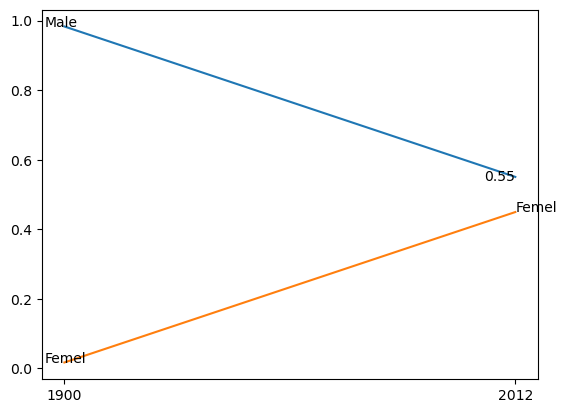

In [121]:
plt.plot(fm['Year'], fm['participation pourcentage'])
plt.plot(ff['Year'], ff['participation pourcentage'])
plt.xticks([1900, 2012])
plt.text(fm['Year'].values[0]+0.02, fm['participation pourcentage'].values[0], '{:,.2f}'.format(fm['participation pourcentage'].values[0]), va='center', ha='right')
plt.text(ff['Year'].values[0]+0.02, ff['participation pourcentage'].values[0], 'Femel')
plt.xticks([1900, 2012])
plt.text(fm['Year'].values[-1]-5, fm['participation pourcentage'].values[-1], 'Male')
plt.text(ff['Year'].values[-1]-5, ff['participation pourcentage'].values[-1], 'Femel')

plt.show()

https://news.ubc.ca/2014/09/30/gender-equality-olympics/

## Pourcentage of medal wont by each gender

In [122]:
l =df.groupby(['Sex', 'Year','Medal']).agg('count').reset_index()
l['count'] = l['ID']
l=l[['Sex','Year','count','Medal']]
l.head()

,Sex,Year,count,Medal
0,F,1900.0,20,0
1,F,1900.0,5,Bronze
2,F,1900.0,4,Gold
3,F,1900.0,4,Silver
4,F,1904.0,6,0


In [123]:
dfm= l[l['Year']==1900]
dfm.groupby(['Sex'])['count'].sum()

Sex
F      33
M    1903
Name: count, dtype: int64

In [124]:
dfm=dfm[dfm['Medal']!=0]
dfm.groupby(['Sex'])['count'].agg('sum')


Sex
F     13
M    591
Name: count, dtype: int64

In [125]:
dfm2= l[l['Year']==2012]
dfm2.groupby(['Sex'])['count'].sum()

Sex
F    5791
M    7093
Name: count, dtype: int64

In [126]:
dfm2=dfm2[dfm2['Medal']!=0]
print(dfm2.groupby(['Sex'])['count'].agg('sum'))

Sex
F     914
M    1023
Name: count, dtype: int64


In [127]:
dfm2= l[l['Year']==2012]
print(dfm2.groupby(['Sex'])['count'].sum())
dfm2=dfm2[dfm2['Medal']!=0]
print(dfm2.groupby(['Sex'])['count'].sum())

Sex
F    5791
M    7093
Name: count, dtype: int64
Sex
F     914
M    1023
Name: count, dtype: int64


explore the slopgraphe and the percentage to compare the percentage of femel and male participation during the time.
the pourcentage of medal from past to know. I will then explore the same direction for the country with most number of medail and also the country with less number of medail.  
If possible, show the distribution of medal get by both gender in the word map.  To get which country could affect the gender performance in the olympic game.  

**count the total number of men and winen who participate to the onlympic and show the number of medal got per gender.**

<AxesSubplot:xlabel='Year', ylabel='count'>

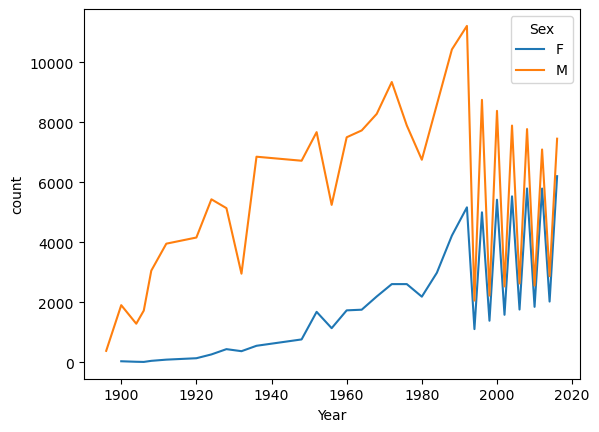

In [132]:
l =df.groupby(['Sex', 'Year']).agg('count').reset_index()
l['count'] = l['ID']
l=l[['Sex','Year','count']]
l['Year'] = l['Year'].astype(int)
sns.lineplot(data=l, x='Year',y='count',hue='Sex')

<AxesSubplot:xlabel='Year', ylabel='count'>

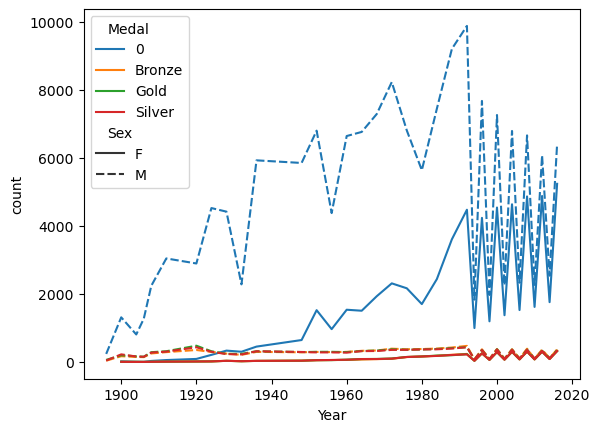

In [134]:
l =df.groupby(['Sex', 'Year','Medal']).agg('count').reset_index()
l['count'] = l['ID']
l=l[['Sex','Year','count','Medal']]
sns.lineplot(data=l, x='Year',y='count',hue='Medal',style='Sex')


<AxesSubplot:xlabel='Year', ylabel='count'>

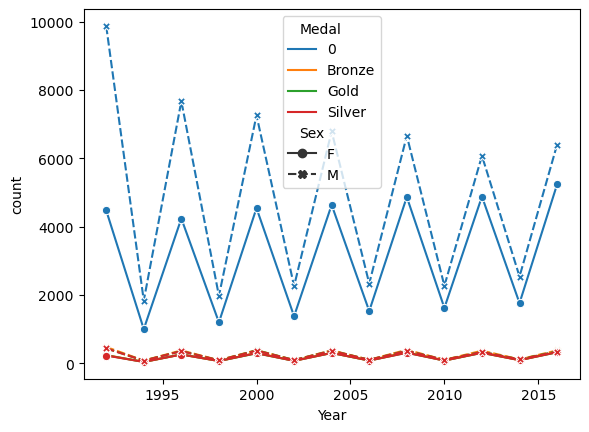

In [135]:
l=l[l['Year']>=1990]
sns.lineplot(data=l, x='Year',y='count',hue='Medal',style='Sex',markers=True)

# How does age and gender affect olympic sports performance?

# Does location really affect an athlete performance?

# How sport Location Affects athlete Performance?

# How does the athlete with more medal evolve in year?

**1. What effect does the host country have in the medals won at the Olympics?**

**2. Is the performance of countries in Olympic games affected by the economic factors of the country?**

**3. Is the age of winning Olympics changing?**


#  Does hosting the Olympic games and the country's economy affect its performance?


In [136]:
import plotly.express as px
import plotly.io as pio

## a) Number of  olympic games host by country

In [ ]:
tmp = df.groupby(['City'])['Season'].value_counts()
df4 = pd.DataFrame(data={'Medal': tmp.values}, index=tmp.index).reset_index()
newdf = df4.merge(country, how='right').dropna()


## b) Top 12 world countries that have won more medial and hosted at least one Olympic game.

In [81]:
cont = newdf.groupby('Country')['Country'].value_counts()
l = pd.unique(newdf['Country'].sort_values())
pfd = pd.DataFrame({'Team':l, 'count':cont.values})
tmp = df.groupby(['Team'])['Medal'].agg('count').dropna()
df5 = pd.DataFrame(tmp).reset_index()

l = df5.merge(pfd, how='right').dropna()
l =l.sort_values(by=['Medal'],ascending=False)
l["count"] = l["count"].astype("category")
l = l.head(12)
pg =gpd[gpd['Country Name'].isin(list(l['Team']))]
pg = pg.sort_values(by=[2016,2015],ascending=False)
pfd = pd.DataFrame({'Team':list(pg['Country Name'].head(12)), 'Oder':[i for i in range(1,13)]})
ll = l.merge(pfd, how='right').dropna()
ll =ll.sort_values(by=['Medal'],ascending=False)

o = ll['Oder'].values.astype(str) # record the worlg GPD rank of the country

rank=["{in1} {in2}".format(in1='Country world GPD rank:', in2=o[i]) for i in range(len(o))]
ll['rank']=rank
fig = px.bar(ll, x="Medal", y="Team", color="count",pattern_shape="rank",text='Medal',
             title="Top 12 world countries that have won more medal and hosted at least one Olympic game between 1900-2016.",
labels={ # replaces default labels by column name
                "count": "Number of Olympic games hosted"
            })
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.03,
    xanchor="right",
    x=1.08
))
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_layout(yaxis=dict(autorange="reversed"), legend_title_font_color="black",
                  font_color="black",legend = dict(font = dict(size = 12)),
    title_font_color="black",)
fig.update_yaxes(title_text='')
fig.update_traces(textposition='outside')
fig.show()



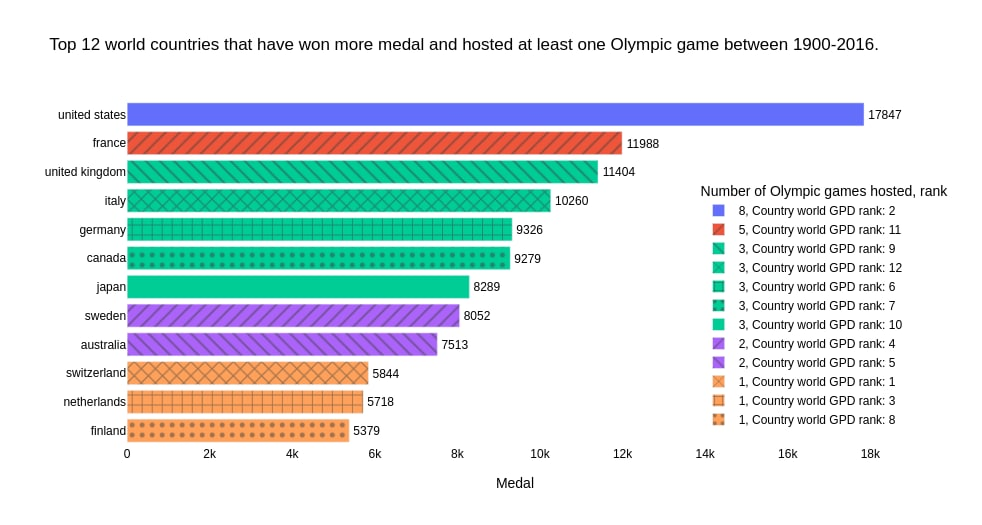

In [82]:
cont = newdf.groupby('Country')['Country'].value_counts()
l = pd.unique(newdf['Country'].sort_values())
pfd = pd.DataFrame({'Team':l, 'count':cont.values})
tmp = df.groupby(['Team'])['Medal'].agg('count').dropna()
df5 = pd.DataFrame(tmp).reset_index()

l = df5.merge(pfd, how='right').dropna()
l =l.sort_values(by=['Medal'],ascending=False)
l["count"] = l["count"].astype("category")
l = l.head(12)
pg =gpd[gpd['Country Name'].isin(list(l['Team']))]
pg = pg.sort_values(by=[2016,2015],ascending=False)
pfd = pd.DataFrame({'Team':list(pg['Country Name'].head(12)), 'Country world GPD rank':[i for i in range(1,13)]})
ll = l.merge(pfd, how='right').dropna()
ll =ll.sort_values(by=['Medal'],ascending=False)

o = ll['Country world GPD rank'].values.astype(str) # record the worlg GPD rank of the country

rank=["{in1} {in2}".format(in1='Country world GPD rank:', in2=o[i]) for i in range(len(o))]
ll['rank']=rank
fig = px.bar(ll, x="Medal", y="Team", color="count",pattern_shape="Country world GPD rank",text='Medal',
             title="Top 12 world countries that have won more medal and hosted at least one Olympic game between 1900-2016.",
labels={ # replaces default labels by column name
                "count": "Number of Olympic games hosted"
            })
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.03,
    xanchor="right",
    x=1.08
))
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_layout(yaxis=dict(autorange="reversed"), legend_title_font_color="black",
                  font_color="black",legend= dict(font = dict(size = 10)),
    title_font_color="black",)
fig.update_yaxes(title_text='')
fig.update_traces(textposition='outside')
fig.show()



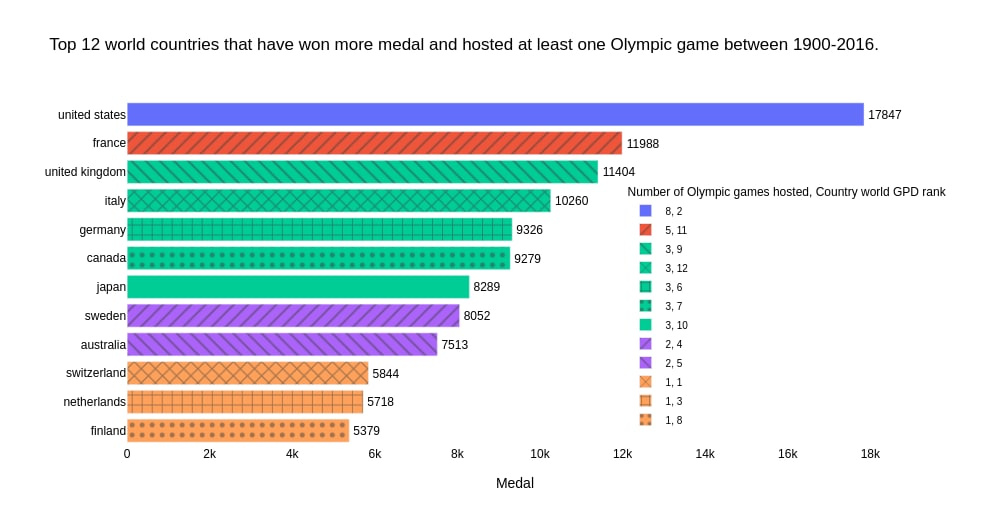

 For example, you might use color to highlight specific columns for storytelling. Colors can also be used if they are meaningful for the categories posted (e.g. to match company or team colors).

## c) Top African countries that have won more medail 

**If the Olympic performance of the riches countries is affected by the place where the games were organised. Therefore what about the country that can not organise the Olympic games?**

In [141]:
pga =gpd[gpd['Country Name'].isin(['cameroon','nigeria','algeria','south africa','kenya','ethiopia','ghana'])]
pga = pga.sort_values(by=[2016,2015],ascending=False)

In [142]:
fda = pd.DataFrame({'Team':list(pga['Country Name']), 'Country Africa GPD rank':[i for i in range(1,len(pga)+1)]})

In [143]:
fda

,Team,Country Africa GPD rank
0,algeria,1
1,south africa,2
2,nigeria,3
3,ghana,4
4,cameroon,5
5,kenya,6
6,ethiopia,7


<Figure size 500x1000 with 0 Axes>

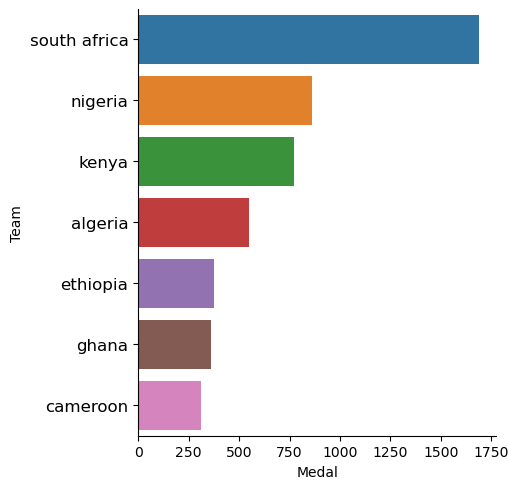

In [144]:
tmp = df.groupby(['Team'])['Medal'].agg('count').dropna()
df5 = pd.DataFrame(tmp).reset_index()
l =df5.sort_values(by=['Medal'],ascending=True)
l = l[(l['Team'] =='cameroon' )| (l['Team'] =='nigeria')| (l['Team'] =='algeria')|(l['Team'] =='south africa')| (l['Team'] =='kenya')|(l['Team'] =='ethiopia')|(l['Team'] =='ghana' )]
#l = l.head(12)
o = l.sort_values(by=['Medal'],ascending=False)
plt.figure(figsize=(5,10))
sns.catplot(data=o, x="Medal", y="Team", kind="bar")
plt.yticks( 
    horizontalalignment='right',
    fontsize='large'  
)
plt.show()

# there is something wrong with the plot

# Trend of the nomber of medal for the 10 top countries that have gain more medal

In [ ]:
tmp = df.groupby(['Year', 'Team', 'City'])['Medal'].agg('count').dropna()
df6 = pd.DataFrame(tmp).reset_index()
l =df6.sort_values(by=['Medal'],ascending=False)
newdfl = l.merge(country, how='right').dropna()
newdfl = newdfl.sort_values(by=['Year'])
df8= newdfl.copy()

In [ ]:

#newdfl= newdfl[newdfl['Year']>2000]

for i in pd.unique(newdfl['Country']):
    place =np.array([])
    for j in range(len(newdfl['Country'])):
        if(newdfl['Country'].iloc[j]==i):
            place = np.append(place,str('home'))
        else:
            place = np.append(place,str('away'))
    df8[i]=list(place)
            


In [ ]:
df8

# parallel plot

In [ ]:

newdfl= newdfl[newdfl['Year']>2000]

for i in pd.unique(newdfl['Country']):
    place =np.array([])
    for j in range(len(newdfl['Country'])):
        if(newdfl['Country'].iloc[j]==i):
            place = np.append(place,str('home'))
        else:
            place = np.append(place,str('away'))
    break
            


In [ ]:
len(place)

In [ ]:

temp = newdfl[newdfl['Team']==i]
temp= temp.drop_duplicates()
temp

In [ ]:
from pandas.plotting import parallel_coordinates

In [ ]:
tem = temp[['Medal']]

In [ ]:
l =tem.T
l.columns = temp['Year']
l['label'] = ['Medal']

In [ ]:
parallel_coordinates(l, "label")

In [ ]:
from plotnine import*

In [ ]:

ggplot(temp)+aes(x='Year', y= 'Medal') + geom_point()+geom_line()

1. Host Country Effect- What is the probability that a participant of the host country can win a medal? Are there any type of sports that the host country has more chance of winning?

2. Economic Effect- Are there any sports that are won mostly by countries with low GDP? Does the rise/fall in economy affect the Olympic winnings of a country, and if so, in how many years is the effect seen?

3. Age Effect- Does the Relative Age Effect influence Olympic winnings? At what age is optimum age for each sport? How does the performance of each athlete improve/degrade over time?

Moreover, looking at the medals count in Olympics official site[4] and comparing with the Olympics history dataset used in this report, there are discrepancies, hence the dataset needs to be revised.